# Black Scholes Option pricer

## Black Scholes Assumptions

1) Interest rate is known and constant through time
2) The stock follows a random walk in continuous time (Brownian motion), the return of the stock price paths follow a log normal distribution (the price is then strictly positive)
3) Volatility is constant
4) Stock pays no dividends (can be modified to include them)
5) The option can only be exercised at maturity (European type option)
6) No transaction costs i.e. fees on short selling
7) Fractional trading is possible

## Black Scholes Formula for Non Dividend Paying Stocks

Denote:
- $S$ the stock price
- $K$ the strike price of the option
- $r$ the risk free rate
- $T$ the time until maturity
- $\sigma$ the annualized volatility of the asset's returns

The formulas for the put and the call are:

- $Call = S_{0}N(d_1) - N(d_2)Ke^{-rT}$

- $Put=N(-d_2)Ke^{-rT} - N(-d_1)S_0$

with

- $d_1 = \frac{ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$

- $d_2 =d_1 - \sigma\sqrt{T}$


In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class BsPricer:
    def __init__(self, S, K, T, r, sigma, q = 0):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.q = q
    
    @staticmethod
    def N(x):
        return norm.cdf(x)
    
    @property
    def params(self):
        return {'S': self.S,
                'K': self.K,
                'T': self.r,
                'r': self.r,
                'q': self.q,
                'sigma': self.sigma}
    
    def d1(self):
        return (np.log(self.S/self.K) + (self.r - self.q + (self.sigma ** 2 / 2) * self.T))/(self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def callPrice(self):
        return self.S*np.exp(-self.q * self.T) * self.N(self.d1()) - self.K * np.exp(-self.r * self.T) * self.N(self.d2())
    
    def putPrice(self):
        return self.K*np.exp(-self.r * self.T) * self.N(- self.d2()) - self.S*np.exp(-self.q * self.T)*self.N(-self.d1())
    
    def price(self, type = 'C'):
        if type == 'C':
            return self.callPrice()
        elif type == 'P':
            return self.putPrice()
        else:
            raise ValueError('Unknown type')


In [2]:
if __name__ == '__main__':
    K = 100
    r = 0.05
    T = 1
    sigma = 0.1
    S = 100
    print(BsPricer(S, K, T, r, sigma).price('C'))

6.804957708822144


# Effect of S on Option Value

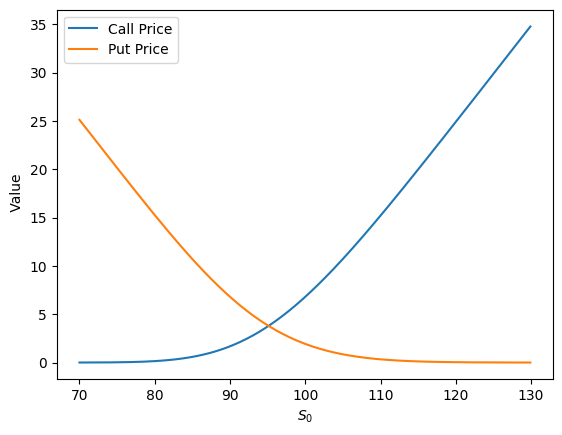

In [8]:
K = 100
r = 0.05
T = 1
sigma = 0.1
S = np.arange(70, 130, 0.1)

calls = [BsPricer(s, K, T, r, sigma).price() for s in S]
puts = [BsPricer(s, K, T, r, sigma).price('P') for s in S]

plt.plot(S, calls, label = 'Call Price')
plt.plot(S, puts, label = 'Put Price')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend();

## Effect of K on Option Value

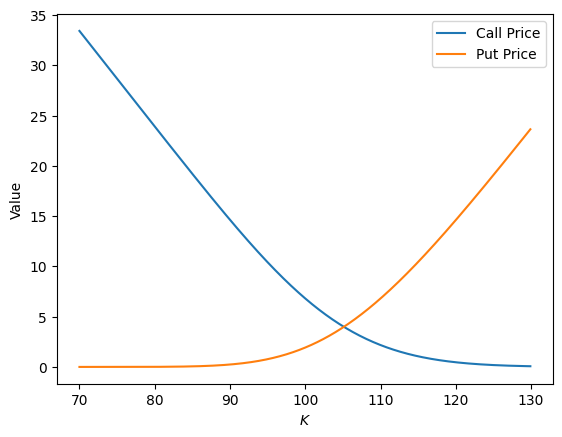

In [7]:
K = np.arange(70, 130, 0.1)
r = 0.05
T = 1
sigma = 0.1
S = 100

calls = [BsPricer(S, k, T, r, sigma).price() for k in K]
puts = [BsPricer(S, k, T, r, sigma).price('P') for k in K]

plt.plot(K, calls, label = 'Call Price')
plt.plot(K, puts, label = 'Put Price')
plt.xlabel('$K$')
plt.ylabel('Value')
plt.legend();

## Effect of $\sigma$ on Option Value

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\andri\AppData\Local\Temp\ipykernel_63708\510040132.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$ \sigma $')


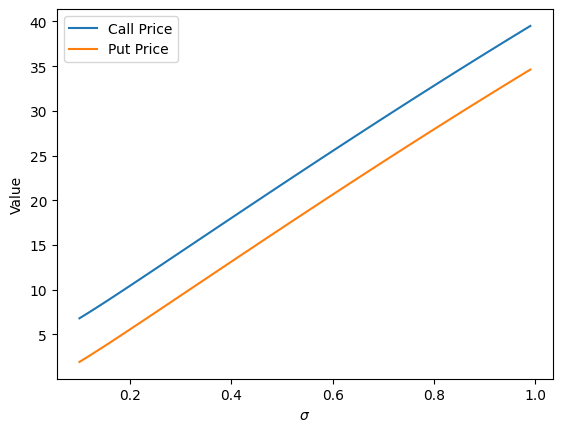

In [ ]:
K = 100
r = 0.05
T = 1
sigma = np.arange(0.1, 1, 0.01)
S = 100

calls = [BsPricer(S, K, T, r, sig).price() for sig in sigma]
puts = [BsPricer(S, K, T, r, sig).price('P') for sig in sigma]

plt.plot(sigma, calls, label = 'Call Price')
plt.plot(sigma, puts, label = 'Put Price')
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend();

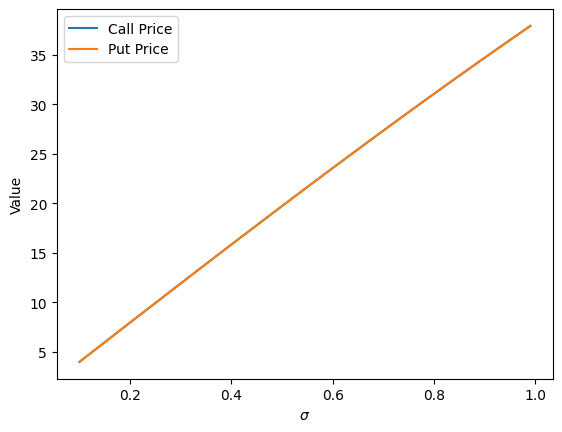

In [19]:
K = 100
r = 0
T = 1
sigma = np.arange(0.1, 1, 0.01)
S = 100

calls = [BsPricer(S, K, T, r, sig).price() for sig in sigma]
puts = [BsPricer(S, K, T, r, sig).price('P') for sig in sigma]

plt.plot(sigma, calls, label = 'Call Price')
plt.plot(sigma, puts, label = 'Put Price')
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend();

## Effect of $T$ on Option Value

As we increase time to maturity, we increase the uncertainty regarding the future price and profit.

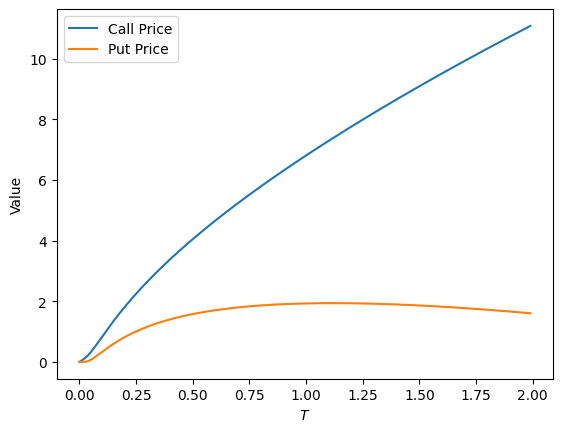

In [17]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.1
S = 100

calls = [BsPricer(S, K, t, r, sigma).price() for t in T]
puts = [BsPricer(S, K, t, r, sigma).price('P') for t in T]

plt.plot(T, calls, label = 'Call Price')
plt.plot(T, puts, label = 'Put Price')
plt.xlabel('$T$')
plt.ylabel('Value')
plt.legend();

The difference between puts and calls is eliminated when the interest rate is zero.

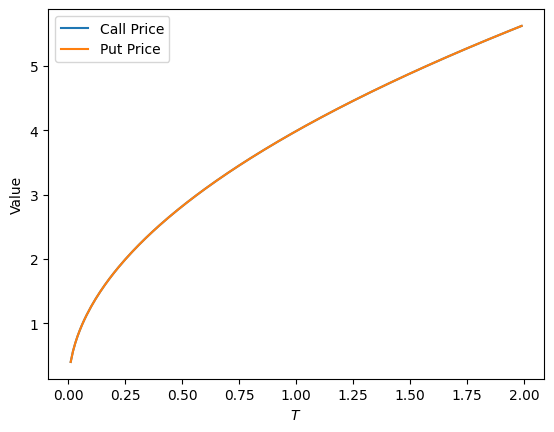

In [18]:
K = 100
r = 0
T = np.arange(0, 2, 0.01)
sigma = 0.1
S = 100

calls = [BsPricer(S, K, t, r, sigma).price() for t in T]
puts = [BsPricer(S, K, t, r, sigma).price('P') for t in T]

plt.plot(T, calls, label = 'Call Price')
plt.plot(T, puts, label = 'Put Price')
plt.xlabel('$T$')
plt.ylabel('Value')
plt.legend();

## Effect of $r$ on Option Value

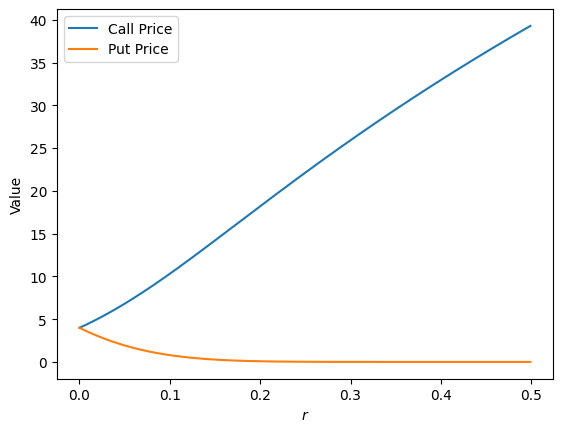

In [20]:
K = 100
r = np.arange(0, 0.5, 0.001)
T = 1
sigma = 0.1
S = 100

calls = [BsPricer(S, K, T, rate, sigma).price() for rate in r]
puts = [BsPricer(S, K, T, rate, sigma).price('P') for rate in r]

plt.plot(r, calls, label = 'Call Price')
plt.plot(r, puts, label = 'Put Price')
plt.xlabel('$r$')
plt.ylabel('Value')
plt.legend();